#Importing all the Libraries and mounting google drive

In [1]:
!pip install emoji
!pip install wordcloud

  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234925 sha256=8a4e24d81a7d3d92e9aecd20457164abb65d72e4275b51ceb81b1eb3e851af99
  Stored in directory: c:\users\rahul\appdata\local\pip\cache\wheels\9a\b8\0f\f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install tensorflow

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
sns.set_style("darkgrid")
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import re, string, nltk
import emoji, bz2
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.layers import Embedding
#from tensorflow.keras.preprocessing.sequence import pad_sequences   -------------------------> this ibrary is not working
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

#Importing datasets

In [107]:
df = pd.read_csv('Twitter_Corona_NLP_train.csv',sep=",", encoding='latin-1')
df.columns=[0,1,2,3,4,5]
df[5]=df[5].apply(lambda x: +1 if x=="Positive" else 0)
df.head()

,0,1,2,3,4,5
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0


In [108]:
df1 = pd.read_csv('Twitter_Corona_NLP_test.csv',sep=",",encoding='latin-1')
df1.columns=[0,1,2,3,4,5]
df1[5]=df1[5].apply(lambda x: +1 if x=="Positive" else 0)
df1.head()

,0,1,2,3,4,5
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,0
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,1
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,0
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,0
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,0


In [109]:
df.shape

(41157, 6)

In [110]:
df1.shape

(3798, 6)

In [111]:
print(f"Trainning Data consists of {df.shape[0]} rows and {df.shape[1]} columns.")
print("\n")
print(f"Testing Data consists of {df1.shape[0]} rows and {df1.shape[1]} columns.")

Trainning Data consists of 41157 rows and 6 columns.


Testing Data consists of 3798 rows and 6 columns.


Text(0.5, 1.0, 'Countplot for Sentiment Labels')

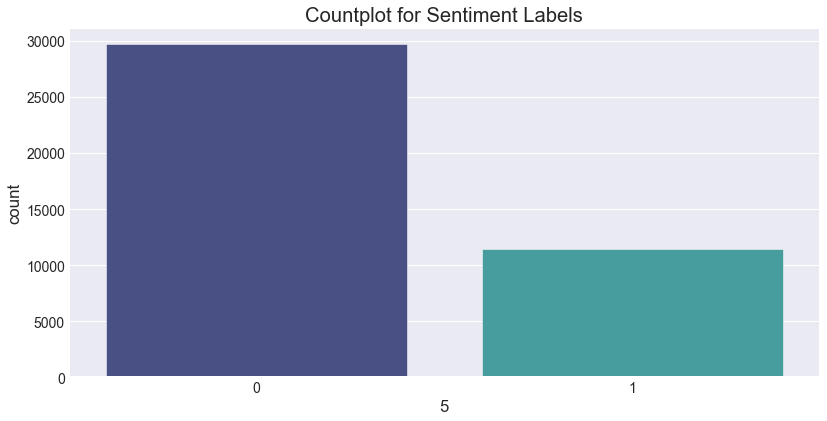

In [112]:
#sns.countplot(df[5],palette="mako")
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
sns.countplot(df[5],palette="mako")
plt.title("Countplot for Sentiment Labels")

In [113]:
#using regex on both trainig and test data to remove numeric as well as any special character after converting it to lowercase
df[4]=df[4].str.lower()
df1[4]=df1[4].str.lower()
df[4] = [re.sub("[^a-z ]","", str(x)) for x in df[4]]
df1[4] = [re.sub("[^a-z ]","", str(x)) for x in df1[4]]
print(df[4][0])
print()
print(df1[4][0])

menyrbie philgahan chrisitv httpstcoifzfanpa and httpstcoxxghgfzcc and httpstcoinlzdxno

trending new yorkers encounter empty supermarket shelves pictured wegmans in brooklyn soldout online grocers foodkick maxdelivery as coronavirusfearing shoppers stock up httpstcogrpcrlwh httpstcoivmkmsqdt


In [114]:
#performing stemming and removing stopwords from training data
stemmer=SnowballStemmer("english")
stopWords = set(stopwords.words('english'))
df[4] = df[4].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split() if word not in (stopWords)]))
df[4] = [word_tokenize(str(x)) for x in df[4]]
print(df[4][0])


['menyrbi', 'philgahan', 'chrisitv', 'httpstcoifzfanpa', 'httpstcoxxghgfzcc', 'httpstcoinlzdxno']


In [115]:
#performing stemming and removing stopwords from test data
df1[4] = df1[4].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split() if word not in (stopWords)]))
df1[4] = [word_tokenize(str(x)) for x in df1[4]]
print(df1[4][0])

['trend', 'new', 'yorker', 'encount', 'empti', 'supermarket', 'shelv', 'pictur', 'wegman', 'brooklyn', 'soldout', 'onlin', 'grocer', 'foodkick', 'maxdeliveri', 'coronavirusfear', 'shopper', 'stock', 'httpstcogrpcrlwh', 'httpstcoivmkmsqdt']


In [116]:

df1[4]=[' '.join(map(str, l)) for l in df1[4]]

In [117]:
df1.head()

,0,1,2,3,4,5
0,1,44953,NYC,02-03-2020,trend new yorker encount empti supermarket she...,0
1,2,44954,"Seattle, WA",02-03-2020,couldnt find hand sanit fred meyer turn amazon...,1
2,3,44955,NaN,02-03-2020,find protect love one coronavirus,0
3,4,44956,Chicagoland,02-03-2020,panic buy hit newyork citi anxious shopper sto...,0
4,5,44957,"Melbourne, Victoria",03-03-2020,toiletpap dunnypap coronavirus coronavirusaust...,0


In [118]:
df[4]=[' '.join(map(str, l)) for l in df[4]]
df.head()

,0,1,2,3,4,5
0,3799,48751,London,16-03-2020,menyrbi philgahan chrisitv httpstcoifzfanpa ht...,0
1,3800,48752,UK,16-03-2020,advic talk neighbour famili exchang phone numb...,1
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworth give elder dis...,1
3,3802,48754,NaN,16-03-2020,food stock one emptypleas dont panic enough fo...,1
4,3803,48755,NaN,16-03-2020,readi go supermarket covid outbreaknot im para...,0


In [119]:
new_df = df[[4,5]]
new_df

,4,5
0,menyrbi philgahan chrisitv httpstcoifzfanpa ht...,0
1,advic talk neighbour famili exchang phone numb...,1
2,coronavirus australia woolworth give elder dis...,1
3,food stock one emptypleas dont panic enough fo...,1
4,readi go supermarket covid outbreaknot im para...,0
...,...,...
41152,airlin pilot offer stock supermarket shelv nz ...,0
41153,respons complaint provid cite covid relat dela...,0
41154,know get tough kameronwild ration toilet paper...,1
41155,wrong smell hand sanit start turn oncoronaviru...,0


In [120]:
new_testdf1=df1[[4,5]]
new_testdf1

,4,5
0,trend new yorker encount empti supermarket she...,0
1,couldnt find hand sanit fred meyer turn amazon...,1
2,find protect love one coronavirus,0
3,panic buy hit newyork citi anxious shopper sto...,0
4,toiletpap dunnypap coronavirus coronavirusaust...,0
...,...,...
3793,meanwhil supermarket israel peopl danc sing to...,1
3794,panic buy lot nonperish item echo need food do...,0
3795,asst prof econom cconc nbcphiladelphia talk re...,0
3796,gov need someth instead biar je rakyat assum l...,0


In [121]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df[4]),np.array(df[5]), test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)

(30867,)
(10290,)


In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2 = TfidfVectorizer(use_idf=True, tokenizer=word_tokenize)
X_train_tf2 = tfidf2.fit_transform(X_train)
X_test_tf2 = tfidf2.transform(X_test)

In [158]:
print(X_train_tf2)

  (0, 5727)	0.343725228611898
  (0, 17140)	0.15842360863605895
  (0, 47151)	0.324849913953672
  (0, 48251)	0.44605751545384525
  (0, 48268)	0.34271087362644803
  (0, 53042)	0.2648128930218668
  (0, 54427)	0.15053240208893912
  (0, 60417)	0.5848277853033162
  (1, 288)	0.1980808440171304
  (1, 2806)	0.2088028647681597
  (1, 4317)	0.3366873184244766
  (1, 7761)	0.18260247942756064
  (1, 8133)	0.062195163143637246
  (1, 12496)	0.21808796153595764
  (1, 13936)	0.20588919570611047
  (1, 17587)	0.122179920222087
  (1, 18653)	0.2382047175639126
  (1, 40287)	0.13667191078206184
  (1, 44362)	0.1279720026469935
  (1, 44634)	0.2709131721543983
  (1, 44647)	0.26547743197652657
  (1, 45135)	0.23424572246485872
  (1, 46611)	0.21170679981621796
  (1, 47684)	0.1393340053529187
  (1, 50758)	0.12026548860443723
  :	:
  (30865, 12767)	0.30674582973236647
  (30865, 16788)	0.3150283894249131
  (30865, 38111)	0.22839140739943595
  (30865, 39233)	0.16636414678310196
  (30865, 47658)	0.2145722919205512
  (3086

In [123]:
rf = RandomForestClassifier()
rf.fit(X_train_tf2, y_train)

RandomForestClassifier()

In [124]:
from sklearn.metrics import roc_auc_score
y_pred = rf.predict(X_test_tf2)
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
roc = roc_auc_score(y_test,y_pred)
print(f"Accuracy: {acc*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred)}")
print(report)

Accuracy: 73.13896987366375% and Roc Auc Score:0.5386434217955957
              precision    recall  f1-score   support

           0       0.73      0.98      0.84      7392
           1       0.66      0.10      0.17      2898

    accuracy                           0.73     10290
   macro avg       0.70      0.54      0.50     10290
weighted avg       0.71      0.73      0.65     10290



In [128]:
!pip install xgboost

In [131]:
!pip install lightgbm

In [132]:
import xgboost
import lightgbm
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
xgb = XGBClassifier(eval_metric="mlogloss")
xgb.fit(X_train_tf2, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [133]:
y_pred2 = xgb.predict(X_test_tf2)
acc2 = accuracy_score(y_pred2, y_test)
report2 = classification_report(y_test, y_pred2)
roc2 = roc_auc_score(y_test,y_pred2)
print(f"Accuracy: {acc2*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred2)}")
print(report2)

Accuracy: 71.1175898931001% and Roc Auc Score:0.52279099222034
              precision    recall  f1-score   support

           0       0.73      0.95      0.83      7392
           1       0.44      0.09      0.15      2898

    accuracy                           0.71     10290
   macro avg       0.58      0.52      0.49     10290
weighted avg       0.65      0.71      0.64     10290



In [134]:
lgb = LGBMClassifier()
lgb.fit(X_train_tf2, y_train)

LGBMClassifier()

In [135]:
y_pred_lgb = lgb.predict(X_test_tf2)
acc_lgb = accuracy_score(y_pred_lgb, y_test)
report_lgb = classification_report(y_test, y_pred_lgb)
roc_lgb = roc_auc_score(y_test,y_pred_lgb)
print(f"Accuracy: {acc_lgb*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred_lgb)}")
print(report_lgb)

Accuracy: 71.72983479105928% and Roc Auc Score:0.5310382552230378
              precision    recall  f1-score   support

           0       0.73      0.96      0.83      7392
           1       0.49      0.10      0.17      2898

    accuracy                           0.72     10290
   macro avg       0.61      0.53      0.50     10290
weighted avg       0.66      0.72      0.64     10290



In [136]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tf2, y_train)

MultinomialNB()

In [137]:
y_pred3 = nb.predict(X_test_tf2)
acc3 = accuracy_score(y_pred3, y_test)
report3 = classification_report(y_test, y_pred3)
roc3 = roc_auc_score(y_test,y_pred3)
print(f"Accuracy: {acc3*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred3)}")
print(report3)

Accuracy: 71.92419825072886% and Roc Auc Score:0.5018674712968192
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      7392
           1       0.80      0.00      0.01      2898

    accuracy                           0.72     10290
   macro avg       0.76      0.50      0.42     10290
weighted avg       0.74      0.72      0.60     10290



In [138]:
gb = GradientBoostingClassifier()
gb.fit(X_train_tf2, y_train)

GradientBoostingClassifier()

In [139]:
y_pred4 = gb.predict(X_test_tf2)
acc4 = accuracy_score(y_pred4, y_test)
report4 = classification_report(y_test, y_pred4)
roc4 = roc_auc_score(y_test,y_pred4)
print(f"Accuracy: {acc4*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred4)}")
print(report4)

Accuracy: 71.82701652089408% and Roc Auc Score:0.503288906142167
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      7392
           1       0.49      0.01      0.02      2898

    accuracy                           0.72     10290
   macro avg       0.61      0.50      0.43     10290
weighted avg       0.66      0.72      0.61     10290



In [140]:
dt = DecisionTreeClassifier()
dt.fit(X_train_tf2, y_train)
y_pred5 = dt.predict(X_test_tf2)
acc5 = accuracy_score(y_pred5, y_test)
report5 = classification_report(y_test, y_pred5)
roc5 = roc_auc_score(y_test,y_pred5)
print(f"Accuracy: {acc5*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred5)}")
print(report5)

Accuracy: 67.82312925170068% and Roc Auc Score:0.5981446844218584
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      7392
           1       0.43      0.41      0.42      2898

    accuracy                           0.68     10290
   macro avg       0.60      0.60      0.60     10290
weighted avg       0.68      0.68      0.68     10290



In [141]:
from sklearn.metrics import precision_score
ps = precision_score(y_test, y_pred)
ps_lgb = precision_score(y_test,y_pred_lgb)
ps2 = precision_score(y_test, y_pred2)
ps3 = precision_score(y_test, y_pred3)
ps4 = precision_score(y_test, y_pred4)
ps5 = precision_score(y_pred5,y_test)

In [142]:
accuracys = [acc,acc2,acc3,acc4,acc5,acc_lgb]
roc_scores = [roc, roc2, roc3, roc4,roc5, roc_lgb]
precision_scores = [ps,ps2,ps3,ps4,ps5,ps_lgb]
models = {"Random Forest":rf,"XGboost":xgb,"Naive Bayes":nb,"Gradient Boosting":gb,"Decision Tree":dt,"LGB Machine":lgb}

model_df = pd.DataFrame({"Models":models.keys(),"Accuracy":accuracys,"Precision Score":precision_scores,"Roc Scores": roc_scores}).sort_values("Roc Scores",ascending=False)

In [143]:
# Summary of Machine Learning Models Performance
model_df

,Models,Accuracy,Precision Score,Roc Scores
4,Decision Tree,0.678231,0.414769,0.598145
0,Random Forest,0.731390,0.655814,0.538643
5,LGB Machine,0.717298,0.491086,0.531038
1,XGboost,0.711176,0.438742,0.522791
3,Gradient Boosting,0.718270,0.492308,0.503289
2,Naive Bayes,0.719242,0.800000,0.501867


In [145]:
from sklearn.model_selection import train_test_split
X = new_df[4]
y = new_df[5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
display(X_train.shape)
display(X_test.shape)

(30867,)

(10290,)

In [146]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [147]:
# using tokenizer to transform text messages into training and testing set
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [148]:
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=64)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=64)

In [149]:
X_train_seq_padded[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0, 14164,     7,     4,   413,   112,   572,  2375,
         580])

Bidirectional LSTM¶

In [150]:
# construct model
BATCH_SIZE = 64

from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1,64))
model.add(Bidirectional(LSTM(100, dropout=0,recurrent_dropout=0)))
model.add(Dense(128, activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile("adam","binary_crossentropy",metrics=["accuracy"])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          3959488   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              132000    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,117,345
Trainable params: 4,117,345
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.i

In [151]:
# Used for preventing ovefitting
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5,verbose=True)

In [152]:
history = model.fit(X_train_seq_padded, y_train,batch_size=BATCH_SIZE,epochs=15,
                    validation_data=(X_test_seq_padded, y_test),callbacks=[early_stop])

Epoch 1/15
483/483 [==============================] - 62s 115ms/step - loss: 0.5659 - accuracy: 0.7233 - val_loss: 0.5332 - val_accuracy: 0.7184
Epoch 2/15
483/483 [==============================] - 56s 117ms/step - loss: 0.4065 - accuracy: 0.8024 - val_loss: 0.5617 - val_accuracy: 0.7266
Epoch 3/15
483/483 [==============================] - 55s 114ms/step - loss: 0.1937 - accuracy: 0.9192 - val_loss: 0.6809 - val_accuracy: 0.7198
Epoch 4/15
483/483 [==============================] - 54s 111ms/step - loss: 0.0892 - accuracy: 0.9659 - val_loss: 0.9133 - val_accuracy: 0.7205
Epoch 5/15
483/483 [==============================] - 55s 115ms/step - loss: 0.0463 - accuracy: 0.9833 - val_loss: 1.0295 - val_accuracy: 0.7176
Epoch 6/15
483/483 [==============================] - 55s 115ms/step - loss: 0.0309 - accuracy: 0.9891 - val_loss: 1.2077 - val_accuracy: 0.7121
Epoch 6: early stopping


In [153]:
from sklearn.metrics import roc_auc_score
pred_train = model.predict(X_train_seq_padded)
pred_test = model.predict(X_test_seq_padded)
print('LSTM Recurrent Neural Network baseline: ' + str(roc_auc_score(y_train, pred_train)))
print('LSTM Recurrent Neural Network: ' + str(roc_auc_score(y_test, pred_test)))

322/322 [==============================] - 5s 14ms/step
LSTM Recurrent Neural Network baseline: 0.9997853419364021
LSTM Recurrent Neural Network: 0.7071047841622377


In [154]:
model.evaluate(X_test_seq_padded, y_test)

322/322 [==============================] - 5s 15ms/step - loss: 1.2077 - accuracy: 0.7121


[1.20771062374115, 0.7120505571365356]

Text(0.5, 1.0, 'Training and Validation Accuracy')

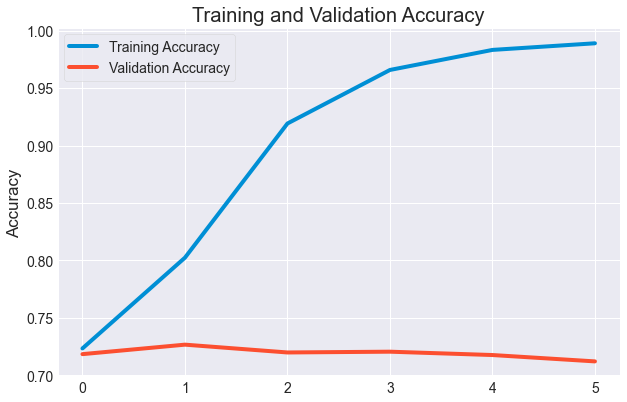

In [155]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(9,6))
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

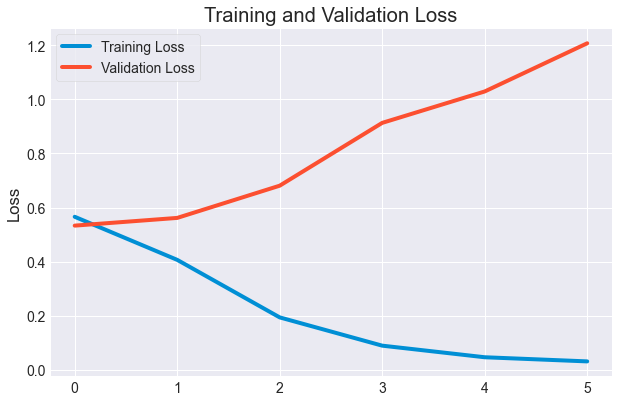

In [156]:
plt.figure(figsize=(9,6))
plt.plot(loss,label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.ylabel("Loss")
plt.title("Training and Validation Loss")